In [1]:
import pandas as pd
import numpy as np
import math
import re
import seaborn as sns
from matplotlib import pyplot as plt

In [10]:
df = pd.read_csv('data/train_clean.csv')
df_orig = pd.read_csv('data/train.csv')

In [3]:
df.head(10)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalBath,Bedroom/Bathroom
0,1,65.000000,8450,7,5,2003,2003,196.0,4,3,...,0,0,1,0,0,0,1,0,4,0.750000
1,2,80.000000,9600,6,8,1976,1976,0.0,3,3,...,0,0,1,0,0,0,1,0,3,1.000000
2,3,68.000000,11250,7,5,2001,2002,162.0,4,3,...,0,0,1,0,0,0,1,0,4,0.750000
3,4,60.000000,9550,7,5,1915,1970,0.0,3,3,...,0,0,1,0,0,0,0,0,2,1.500000
4,5,84.000000,14260,8,5,2000,2000,350.0,4,3,...,0,0,1,0,0,0,1,0,4,1.000000
5,6,85.000000,14115,5,5,1993,1995,0.0,3,3,...,0,0,1,0,0,0,1,0,3,0.333333
6,7,75.000000,10084,8,5,2004,2005,186.0,4,3,...,0,0,1,0,0,0,1,0,3,1.000000
7,8,86.887741,10382,7,6,1973,1973,240.0,3,3,...,0,0,1,0,0,0,1,0,4,0.750000
8,9,51.000000,6120,7,5,1931,1950,0.0,3,3,...,0,0,1,0,0,0,0,0,2,1.000000
9,10,50.000000,7420,5,6,1939,1950,0.0,3,3,...,0,0,1,0,0,0,1,0,2,1.000000


In [7]:
housestyle = df.loc[:,['HouseStyle_SLvl', 'HouseStyle_SFoyer', 'HouseStyle_2Story', 'HouseStyle_2.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_1Story', 'HouseStyle_1.5Unf']]
housestyle

,HouseStyle_SLvl,HouseStyle_SFoyer,HouseStyle_2Story,HouseStyle_2.5Unf,HouseStyle_2.5Fin,HouseStyle_1Story,HouseStyle_1.5Unf
0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
1447,0,0,1,0,0,0,0
1448,0,0,0,0,0,1,0
1449,0,0,1,0,0,0,0
1450,0,0,0,0,0,1,0


In [9]:
np.sum(housestyle, axis=0)

HouseStyle_SLvl       65
HouseStyle_SFoyer     37
HouseStyle_2Story    442
HouseStyle_2.5Unf     11
HouseStyle_2.5Fin      8
HouseStyle_1Story    721
HouseStyle_1.5Unf     14
dtype: int64

In [20]:
housestyle_price = df_orig.loc[:, ['SalePrice', 'HouseStyle', '1stFlrSF', '2ndFlrSF']]
housestyle_price

,SalePrice,HouseStyle,1stFlrSF,2ndFlrSF
0,208500,2Story,856,854
1,181500,1Story,1262,0
2,223500,2Story,920,866
3,140000,2Story,961,756
4,250000,2Story,1145,1053
...,...,...,...,...
1455,175000,2Story,953,694
1456,210000,1Story,2073,0
1457,266500,2Story,1188,1152
1458,142125,1Story,1078,0


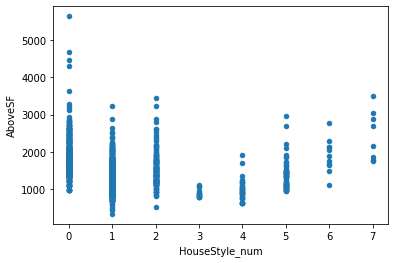

In [21]:
housestyle_price['HouseStyle_num'] = housestyle_price['HouseStyle'].apply(lambda x: np.where(housestyle_price['HouseStyle'].unique() == x)[0][0])
housestyle_price['AboveSF'] = housestyle_price['1stFlrSF'] + housestyle_price['2ndFlrSF']
housestyle_price
housestyle_price.plot.scatter(x='HouseStyle_num', y='AboveSF')

In [15]:
housestyle_price['HouseStyle'].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)